In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data loading

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = untar_data(URLs.PETS)

In [5]:
path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/small-96'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/small-256')]

In [7]:
(path/'images').ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_100.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Bengal_82.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_180.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/german_shorthaired_7.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/english_setter_110.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/english_setter_60.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/scottish_terrier_155.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Ragdoll_114.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pug_144.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Siamese_116.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_27.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxfor

In [8]:
(path/'annotations').ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/trimaps'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/list.txt'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/xmls'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations/README')]

In [9]:
!cat /home/jupyter/.fastai/data/oxford-iiit-pet/annotations/README

OXFORD-IIIT PET Dataset
-----------------------
Omkar M Parkhi, Andrea Vedaldi, Andrew Zisserman and C. V. Jawahar

We have created a 37 category pet dataset with roughly 200 images for each class. 
The images have a large variations in scale, pose and lighting. All images have an 
associated ground truth annotation of breed, head ROI, and pixel
level trimap segmentation.

Contents:
--------
trimaps/ 	Trimap annotations for every image in the dataset
		Pixel Annotations: 1: Foreground 2:Background 3: Not classified
xmls/		Head bounding box annotations in PASCAL VOC Format

list.txt	Combined list of all images in the dataset
		Each entry in the file is of following nature:
		Image CLASS-ID SPECIES BREED ID
		ID: 1:37 Class ids
		SPECIES: 1:Cat 2:Dog
		BREED ID: 1-25:Cat 1:12:Dog
		All images with 1st letter as captial are cat images while
		images with small first letter are dog images.
trainval.txt	Files describing splits used in the paper.However,
test.txt	you are encouraged to try ra

In [10]:
il = ImageList.from_folder(path/'images', presort=True)

In [11]:
il.items

array([PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'), ...,
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_96.jpg'),
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_97.jpg'),
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_98.jpg'),
       PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_99.jpg')], dtype=object)

In [12]:
il

ImageList (7390 items)
Image (3, 400, 600),Image (3, 500, 375),Image (3, 500, 394),Image (3, 313, 450),Image (3, 465, 500)
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images

In [13]:
sl = il.split_by_rand_pct(valid_pct=0.1)

In [14]:
sl

ItemLists;

Train: ImageList (6651 items)
Image (3, 400, 600),Image (3, 500, 375),Image (3, 500, 394),Image (3, 313, 450),Image (3, 465, 500)
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: ImageList (739 items)
Image (3, 225, 300),Image (3, 320, 500),Image (3, 275, 183),Image (3, 332, 500),Image (3, 319, 352)
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None

In [15]:
labelList = (sl
             .label_from_re(r'/([^/]+)_\d+.jpg$')
             .transform(get_transforms(), size=224)
            )
labelList

LabelLists;

Train: LabelList (6651 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (739 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,havanese,Ragdoll,havanese,Birman
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None

In [16]:
data = labelList.databunch(bs=64).normalize(imagenet_stats)

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn

Learner(data=ImageDataBunch;

Train: LabelList (6651 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (739 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,havanese,Ragdoll,havanese,Birman
Path: /home/jupyter/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 

In [27]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


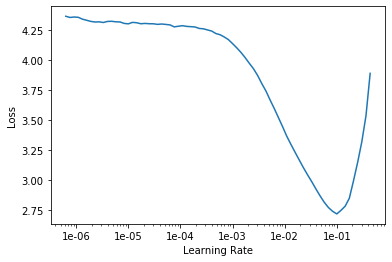

In [29]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(cyc_len=4, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.839411,0.916770,0.286874,00:34
1,0.720668,0.520988,0.162382,00:32
2,0.473736,0.279554,0.090663,00:32
3,0.301171,0.254652,0.064953,00:32


In [30]:
learn.fit_one_cycle(cyc_len=4)

epoch,train_loss,valid_loss,error_rate,time
0,1.273324,0.374240,0.104195,00:32
1,0.495918,0.269677,0.083897,00:32
2,0.326933,0.262715,0.075778,00:32
3,0.257844,0.243613,0.078484,00:32


# Interpretation

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

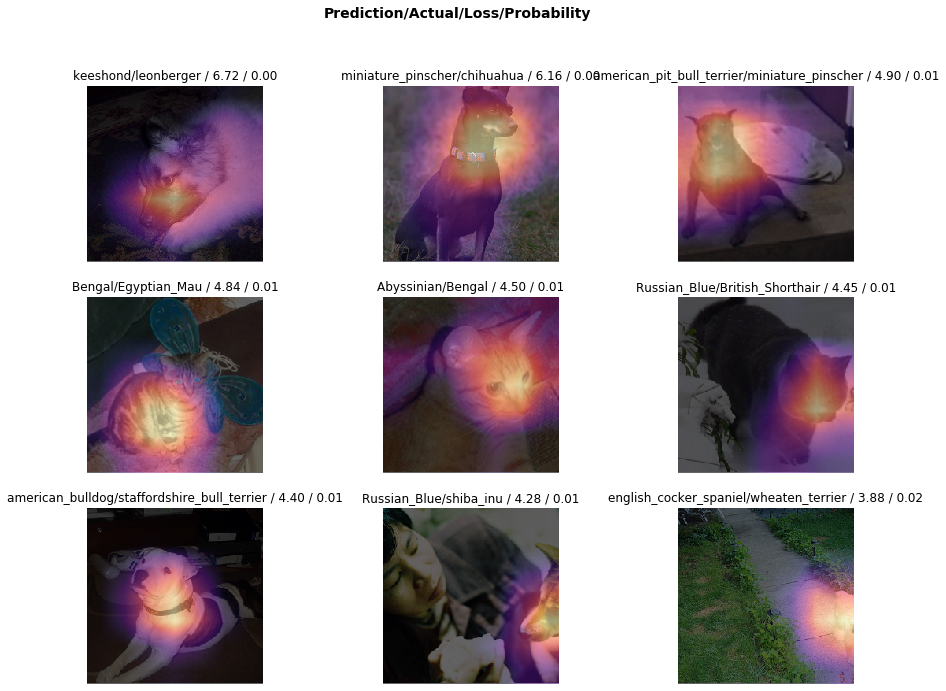

In [39]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

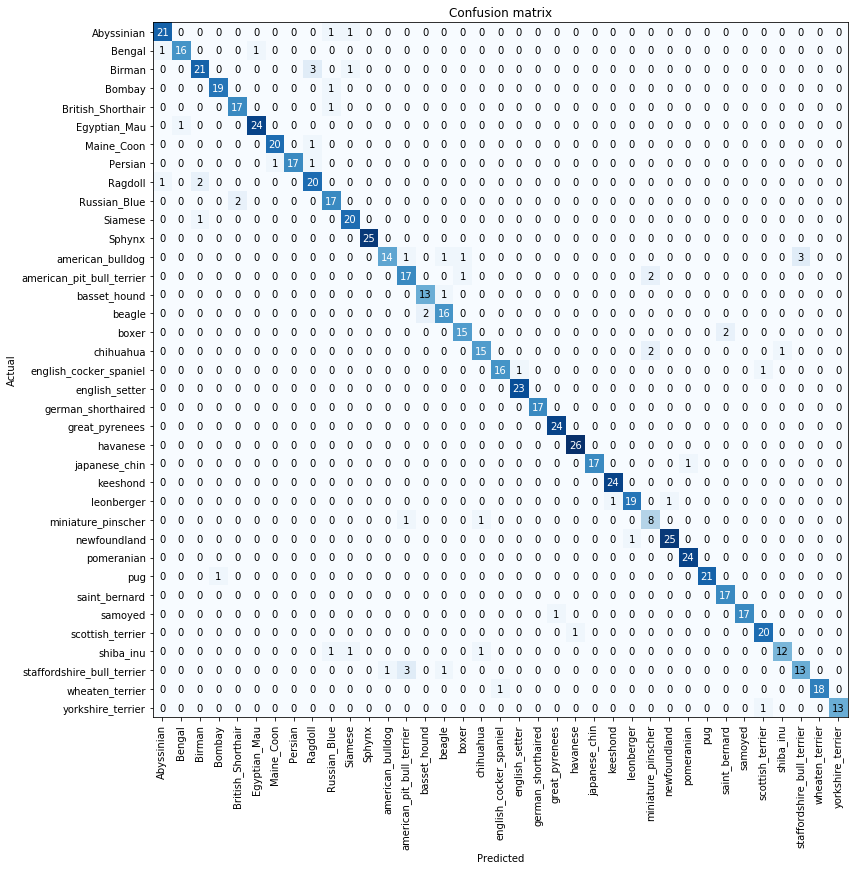

In [37]:
interp.plot_confusion_matrix(figsize=(12,12))

In [41]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.247968,0.247422,0.069012,00:42
1,0.220949,0.231300,0.071719,00:42
2,0.159940,0.212048,0.067659,00:42
3,0.123472,0.212243,0.064953,00:43


In [42]:
interp2 = ClassificationInterpretation.from_learner(learn)

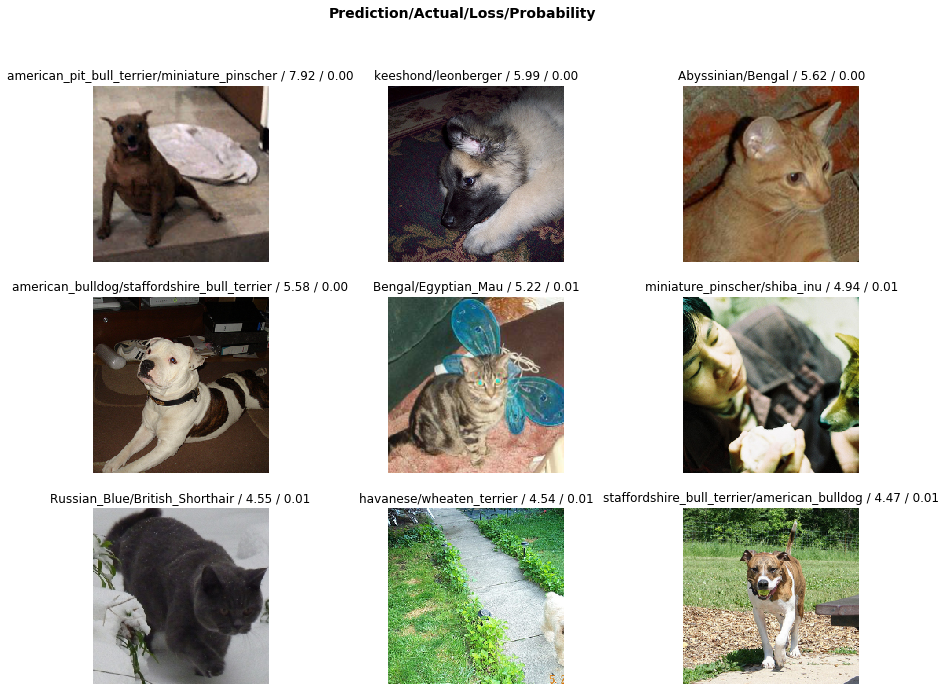

In [43]:
interp2.plot_top_losses(9, figsize=(15,11))